In [40]:
# importing required libraries
import math
import copy
import numpy as np

# torch packages
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import Tensor

# visualization packages
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

example = "Hello! This is an example of a paragraph that has been split into its basic components. I wonder what will come next! Any guesses?"

def tokenize(sequence):
  # remove punctuation
  for punc in ["!", ".", "?"]:
    sequence = sequence.replace(punc, "")
  
  # split the sequence on spaces and lowercase each token
  return [token.lower() for token in sequence.split(" ")]

tokenize(example)

['hello',
 'this',
 'is',
 'an',
 'example',
 'of',
 'a',
 'paragraph',
 'that',
 'has',
 'been',
 'split',
 'into',
 'its',
 'basic',
 'components',
 'i',
 'wonder',
 'what',
 'will',
 'come',
 'next',
 'any',
 'guesses']

In [41]:
def build_vocab(data):
  # tokenize the data and remove duplicates
  vocab = list(set(tokenize(data)))

  # sort the vocabulary
  vocab.sort()

  # assign an integer to each word
  stoi = {word:i for i, word in enumerate(vocab)}

  return stoi

# build the vocab
stoi = build_vocab(example)

stoi 

{'a': 0,
 'an': 1,
 'any': 2,
 'basic': 3,
 'been': 4,
 'come': 5,
 'components': 6,
 'example': 7,
 'guesses': 8,
 'has': 9,
 'hello': 10,
 'i': 11,
 'into': 12,
 'is': 13,
 'its': 14,
 'next': 15,
 'of': 16,
 'paragraph': 17,
 'split': 18,
 'that': 19,
 'this': 20,
 'what': 21,
 'will': 22,
 'wonder': 23}

In [42]:
sequence = [stoi[word] for word in tokenize("I wonder what will come next!")]
sequence

[11, 23, 21, 22, 5, 15]

In [43]:
# vocab size
vocab_size = len(stoi)

# embedding dimensions
d_model = 3

# generate the embedding layer
embeddings = torch.rand(vocab_size, d_model) # matrix of size (24, 3)
embeddings

tensor([[0.5233, 0.3425, 0.4189],
        [0.4057, 0.4518, 0.6063],
        [0.7475, 0.1654, 0.3313],
        [0.6492, 0.1469, 0.6261],
        [0.4775, 0.7320, 0.7710],
        [0.5859, 0.6360, 0.7010],
        [0.9489, 0.3420, 0.0434],
        [0.9535, 0.6028, 0.3017],
        [0.2890, 0.3988, 0.6251],
        [0.1815, 0.9650, 0.5133],
        [0.9044, 0.8681, 0.6429],
        [0.5894, 0.3848, 0.1472],
        [0.7019, 0.0453, 0.9320],
        [0.0468, 0.0307, 0.6464],
        [0.2069, 0.5862, 0.6763],
        [0.0366, 0.6076, 0.3780],
        [0.9388, 0.3037, 0.3868],
        [0.3709, 0.4720, 0.6295],
        [0.7435, 0.4095, 0.3477],
        [0.1042, 0.1847, 0.4278],
        [0.6833, 0.6873, 0.0507],
        [0.9262, 0.8154, 0.0442],
        [0.4514, 0.5927, 0.6185],
        [0.9485, 0.9009, 0.3242]])

In [44]:
# embed the sequence
embedded_sequence = embeddings[sequence]

embedded_sequence

tensor([[0.5894, 0.3848, 0.1472],
        [0.9485, 0.9009, 0.3242],
        [0.9262, 0.8154, 0.0442],
        [0.4514, 0.5927, 0.6185],
        [0.5859, 0.6360, 0.7010],
        [0.0366, 0.6076, 0.3780]])

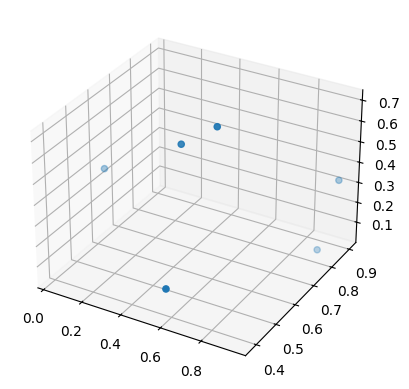

In [45]:
# visualize the embeddings in 3 dimensions
x, y, z = embedded_sequence[:, 0], embedded_sequence[:, 1], embedded_sequence[:, 2] 
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z)  

In [46]:
# vocab size
vocab_size = len(stoi)  # 24

# embedding dimensions
d_model = 3

# create the embeddings
lut = nn.Embedding(vocab_size, d_model) # look-up table (lut)

# view the embeddings
lut.state_dict()['weight']

tensor([[-1.2082, -1.6389, -0.1244],
        [ 0.1520,  0.4230, -0.3666],
        [ 0.1675, -0.0447, -0.6777],
        [ 0.2376,  0.0250, -1.3264],
        [ 0.6653,  1.8999,  1.2822],
        [ 0.1066, -2.6024,  0.8044],
        [-0.5042,  0.8463, -2.2776],
        [ 0.5513,  0.0165,  0.8108],
        [ 2.0426, -0.6532, -0.7072],
        [ 0.1311,  1.3628, -0.5766],
        [-0.1713, -0.1282,  0.4799],
        [-0.7852, -0.9339,  1.8896],
        [ 0.0664,  1.5171,  0.2136],
        [ 0.7413,  0.7590, -0.3394],
        [ 0.1730, -1.3441,  0.3912],
        [-0.8598, -0.2829, -0.2064],
        [ 0.1835,  0.8432, -0.7779],
        [ 0.1750, -0.1776,  0.2768],
        [-1.4389,  0.3146,  1.7383],
        [ 0.1042,  0.2257, -1.0840],
        [-1.4357, -1.9512, -1.5555],
        [ 1.9355, -1.2903, -1.0637],
        [-1.1942, -1.0710, -0.3084],
        [ 0.5871, -0.1459,  1.9570]])

In [47]:
indices = torch.Tensor(sequence).long()
embeddings = lut(indices)

embeddings,indices

(tensor([[-0.7852, -0.9339,  1.8896],
         [ 0.5871, -0.1459,  1.9570],
         [ 1.9355, -1.2903, -1.0637],
         [-1.1942, -1.0710, -0.3084],
         [ 0.1066, -2.6024,  0.8044],
         [-0.8598, -0.2829, -0.2064]], grad_fn=<EmbeddingBackward0>),
 tensor([11, 23, 21, 22,  5, 15]))

In [48]:
class Embeddings(nn.Module):
  def __init__(self, vocab_size: int, d_model: int):
    """
    Args:
      vocab_size:     size of vocabulary
      d_model:        dimension of embeddings
    """
    # inherit from nn.Module
    super().__init__()   
     
    # embedding look-up table (lut)                          
    self.lut = nn.Embedding(vocab_size, d_model)   

    # dimension of embeddings 
    self.d_model = d_model                          

  def forward(self, x: Tensor):
    """
    Args:
      x: input Tensor (batch_size, seq_length)
      
    Returns:
        embedding vector
    """
    # embeddings by constant sqrt(d_model)
    # return self.lut(x) * math.sqrt(self.d_model)  
    return self.lut(x) 

In [49]:
lut = Embeddings(vocab_size, d_model)
print('embedding: \n', lut.state_dict()['lut.weight'])
print('lut: ', lut)
print('indices: ', indices)
lut(indices)


embedding: 
 tensor([[ 1.1335e+00,  5.1434e-01,  2.1042e-01],
        [-1.3207e+00,  1.0518e+00, -3.4178e-01],
        [ 6.4994e-01,  1.2835e+00,  2.1939e-01],
        [-1.1837e+00,  6.9436e-01, -4.4858e-01],
        [ 1.0672e+00,  1.1528e+00, -1.3946e+00],
        [-8.0071e-01,  1.8292e+00, -1.2165e+00],
        [ 1.3650e-01, -1.4294e-01,  1.4076e+00],
        [-3.8669e-01, -2.8427e-01, -2.7554e-01],
        [-2.2836e+00,  2.6647e-01, -4.5173e-01],
        [ 1.1937e-02,  1.5782e+00, -1.1041e+00],
        [ 3.1097e+00, -1.5032e-01,  1.6512e-01],
        [-6.4373e-01, -1.5941e+00, -1.1886e+00],
        [ 4.2041e-01,  2.7611e+00,  5.4335e-01],
        [-9.0657e-01,  1.9472e-01, -6.7411e-01],
        [-1.4876e+00, -1.6076e+00, -2.6813e-01],
        [ 3.8565e-01, -7.0785e-01,  9.2408e-01],
        [ 1.8939e-01, -7.0278e-01,  6.0844e-01],
        [-2.6999e-01, -2.6607e-03, -1.1189e+00],
        [ 1.5090e+00, -7.8716e-01,  1.0917e-01],
        [-2.7033e-01, -1.2644e+00,  1.5246e+00],
       

tensor([[-0.6437, -1.5941, -1.1886],
        [ 0.0691, -0.4625, -0.8419],
        [ 0.3856,  0.1306, -0.9915],
        [ 0.2086,  0.7091,  1.6290],
        [-0.8007,  1.8292, -1.2165],
        [ 0.3857, -0.7079,  0.9241]], grad_fn=<EmbeddingBackward0>)

In [53]:
# list of sequences (3, )
sequences = ["I wonder what will come next!",
             "This is a basic example paragraph.",
             "Hello what is a basic split?"]



In [54]:
# tokenize the sequences
tokenized_sequences = [tokenize(seq) for seq in sequences]
tokenized_sequences

[['i', 'wonder', 'what', 'will', 'come', 'next'],
 ['this', 'is', 'a', 'basic', 'example', 'paragraph'],
 ['hello', 'what', 'is', 'a', 'basic', 'split']]

In [56]:
# index the sequences 
print('stoi: ', stoi)
indexed_sequences = [[stoi[word] for word in seq] for seq in tokenized_sequences]

print('indexed_sequences: ', indexed_sequences)

stoi:  {'a': 0, 'an': 1, 'any': 2, 'basic': 3, 'been': 4, 'come': 5, 'components': 6, 'example': 7, 'guesses': 8, 'has': 9, 'hello': 10, 'i': 11, 'into': 12, 'is': 13, 'its': 14, 'next': 15, 'of': 16, 'paragraph': 17, 'split': 18, 'that': 19, 'this': 20, 'what': 21, 'will': 22, 'wonder': 23}
indexed_sequences:  [[11, 23, 21, 22, 5, 15], [20, 13, 0, 3, 7, 17], [10, 21, 13, 0, 3, 18]]


In [57]:
# convert the sequences to a tensor
tensor_sequences = torch.tensor(indexed_sequences).long()

lut(tensor_sequences)

tensor([[[-6.4373e-01, -1.5941e+00, -1.1886e+00],
         [ 6.9098e-02, -4.6248e-01, -8.4190e-01],
         [ 3.8565e-01,  1.3059e-01, -9.9146e-01],
         [ 2.0860e-01,  7.0910e-01,  1.6290e+00],
         [-8.0071e-01,  1.8292e+00, -1.2165e+00],
         [ 3.8565e-01, -7.0785e-01,  9.2408e-01]],

        [[-1.0603e+00,  7.4050e-02, -9.4541e-01],
         [-9.0657e-01,  1.9472e-01, -6.7411e-01],
         [ 1.1335e+00,  5.1434e-01,  2.1042e-01],
         [-1.1837e+00,  6.9436e-01, -4.4858e-01],
         [-3.8669e-01, -2.8427e-01, -2.7554e-01],
         [-2.6999e-01, -2.6607e-03, -1.1189e+00]],

        [[ 3.1097e+00, -1.5032e-01,  1.6512e-01],
         [ 3.8565e-01,  1.3059e-01, -9.9146e-01],
         [-9.0657e-01,  1.9472e-01, -6.7411e-01],
         [ 1.1335e+00,  5.1434e-01,  2.1042e-01],
         [-1.1837e+00,  6.9436e-01, -4.4858e-01],
         [ 1.5090e+00, -7.8716e-01,  1.0917e-01]]],
       grad_fn=<EmbeddingBackward0>)